pip install git+https://github.com/masamitsu-murase/python_vnc_client

In [6]:
import time

import cv2
import numpy as np
from IPython.display import clear_output, display
from matplotlib import pyplot as plt
from PIL import Image
from python_vnc_client.vnc import Vnc

In [12]:

def green_blue_swap(image):
    # 3-channel image (no transparency)
    if image.shape[-1] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # 4-channel image (with transparency)
    elif image.shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)
    return image 

In [13]:
def ImageSource(host, port=5900):
    vnc = Vnc(
        host,
        port,
    )
    try:
        vnc.connect()
        while True:

            try:
                image = vnc.capture_screen(True)

                data = np.array(image, dtype=np.uint8)
                data = green_blue_swap(data)
                data = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
                yield data
            except Exception as e:
                print(e)
                break
    finally:
        vnc.close()

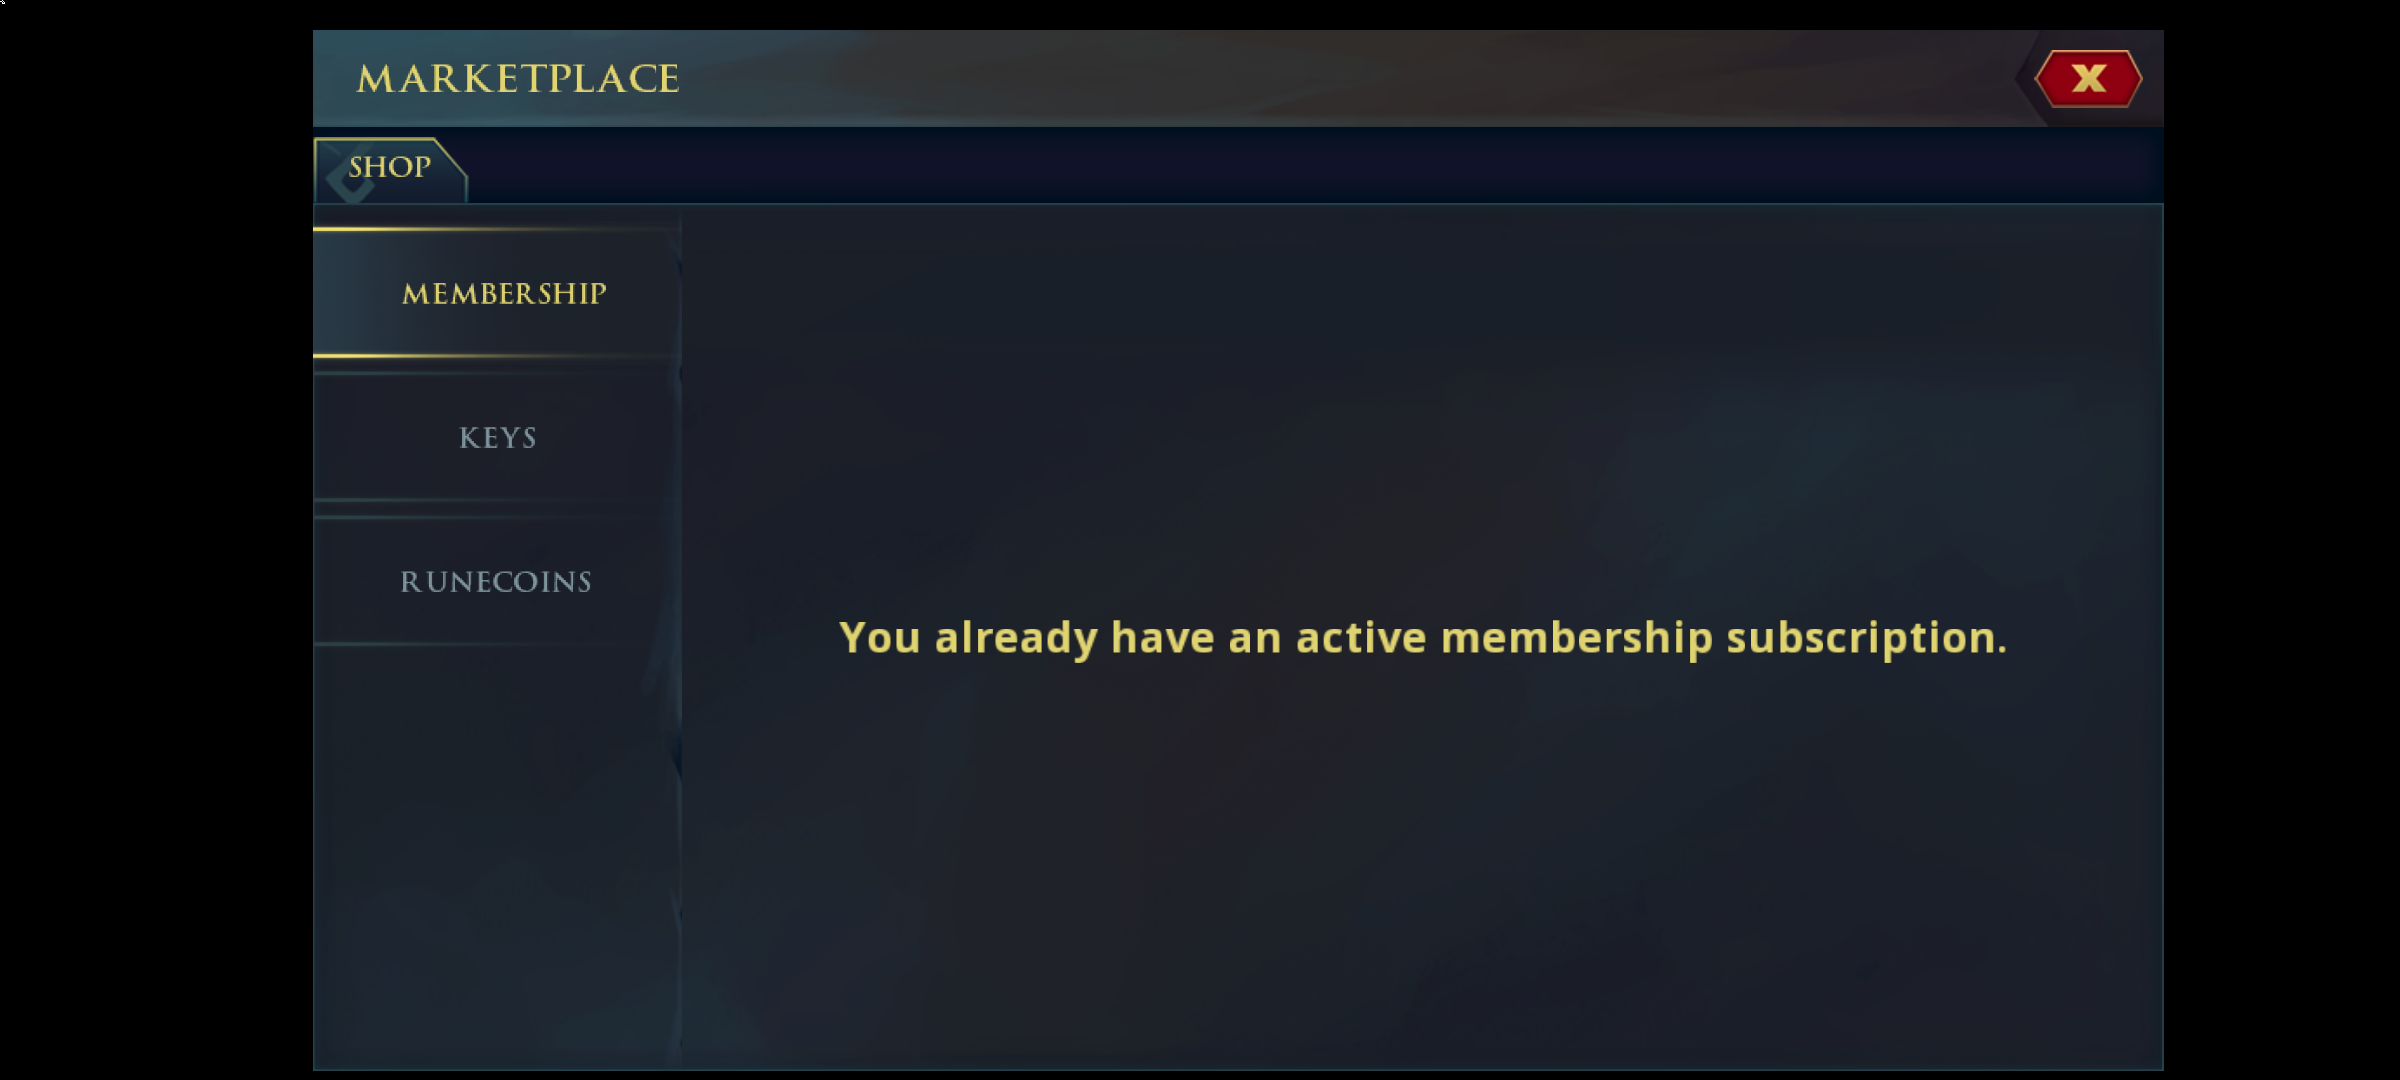

In [ ]:
for image in ImageSource("10.0.0.26"):
    clear_output()
    display(Image.fromarray(image))